# **Project Name** - Uber Supply Demand Gap 

##### **Project Type** - EDA
##### **Contribution** - Individual

# **Project Summary -**

Uber is an online car aggrigate service. Uber loses out on its revenue due to the supply and demand gap of the cars. This is mainly due to cancellation of requests by drivers and non-availability of cars.
In this project, we will study, visualize and solve Uber's Supply Demand Gap Problem.  
In Uber Dataset we have total 6745 record. All the trips are related to only Airport-City and City Airpots.
Among that there are three types of Trips:
    1.Trips completed
    2.Cancelled
    3.No cars available
    
The aim of analysis is to identify the root cause of Uber's problem (i.e.cancellation and non-availability of cars) and recommend ways to improve the situation.
The approach for this project has been to divide the entire case study into various checkpoints to meet each of the sub-goals usind EDA and Visualization.

For this project, we will follow the following strategy:

1.Identify the problimatic trip status for trips originating from airport and city.
2.Analyze if the day of week has any impact on the trips originating from airport and city for the problematic trip status.
3.Determine the pressing problems by analyzing the request frequency of trips from airport and city for problematic trip statuses.
4.Analyze the demand for cabs for each tieslot for trips from airport and city.
5.Identify the timeslot that has the highest demand and supply gap, and find the request type (airport to city or city to airport) that is hugely effected.
6.Identify the reasons for the gap.
7.Recommend ways to resolve the gap.
    

# **GitHub Link -**

https://github.com/madhuripingle

# **Problem Statement**

In [ ]:
Find out the supply demand gap and suggest way to improve the situation.
 

Based on the problem statement, we should focus on pickup point, status and driver id.

#### **Business Objective**

1.   Identify patterns and trends in trip requests by time of day, day of the week, and pickup location.
2.   Detect peak demand hours and areas where the supply of drivers consistently fails to meet user demand.
3.   Analyze the reasons behind unfulfilled requests, such as high cancellation rates or no car availability.
4.  Generate actionable insights that can help Uber optimize driver distribution and improve customer satisfaction.      

# ***Let's Begin !***

## ***1. Know yur Data***

## Import Libraries

In [305]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [167]:
uber = pd.read_csv("Uber Request Data.csv")

### Dataset First View

In [168]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 9:17,12/07/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3879,Airport,1.0,Trip Completed,13/07/2016 21:57,13/07/2016 22:28


### Dataset Rows & Columns count

In [169]:
 print(uber.shape)

(6745, 6)


There are 6745 rowas and 6 columns in Dataset.

### Dataset Information

In [170]:
print(uber.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None 



#### Duplicate Values

In [171]:
print("uber: ",uber.duplicated().sum())

uber:  0


In [ ]:
No duplicate value in uber dataset.

#### Missing Values/Null Values

In [135]:
print("uber: ", uber.isnull().sum())

uber:  Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


Null valued are present in Driver id and Drop timestamp

### What did you know about your dataset?

 ---

 ## **Dataset Summary: Uber Request Data**

This dataset captures **ride request information** from **Uber** in **Bangalore** over a period of **several days in July 2016**. It is intended for analyzing operational challenges and service performance, particularly at two major locations: **Airport** and **City**.

---

### **File Name:**

`Uber Request Data.csv`

### **Rows (Records):**

6745

###  **Columns and Description:**
 1.  **Request ID**: Unique identifier for each ride request
 2.  **Pickup point**: Location from where the ride was requested – either **City** or **Airport**
 3.  **Driver ID**: Unique identifier for the driver (may be blank if no driver was assigned)
 4.  **Status**: Final status of the ride – **Trip Completed**, **Cancelled**, or **No Cars Available**
 5.  **Request Timestamp**: Time when the ride was requested  
 6.  **Drop Timestamp**: Time when the trip ended (only present if the trip was completed)

##  **What We Can Understand from the Dataset**

###  **Primary Objectives & Analysis Goals:**

* Identify **supply-demand gaps**.
* Analyze **driver availability patterns**.
* Understand **ride request behavior** at different times of the day.
* Study cancellation trends and “No cars available” scenarios.
* Derive **actionable insights** for operations improvement.
* 

## ***2. Understanding Your Variables***

### Variables Description

---

###  **Uber Request Data - Variable Description**

| **Variable**        | **Description**                                                                                       |
| ------------------- | ----------------------------------------------------------------------------------------------------- |
| `Request id`        | A unique identifier assigned to each ride request.                                                    |
| `Pickup point`      | The pickup location category for the request: either `City` or `Airport`.                             |
| `Driver id`         | The unique ID of the driver who accepted the request (blank if not assigned).                         |
| `Status`            | The current status of the request:<br> - `Trip Completed`<br> - `Cancelled`<br> - `No Cars Available` |
| `Request timestamp` | The date and time when the ride was requested by the customer.                                        |
| `Drop timestamp`    | The date and time when the trip was completed (or ended).                                             |

---


## 3. ***Data Wrangling***

#### Rename columns and remove space or special characters so that we can query easily for our analysis

In [173]:
uber.rename(columns = {'Drop timestamp':'Drop_timestamp','Driver id':'Driver_id','Request id':'Request_id','Pickup point':'Pickup_point','Request timestamp':'Request_timestamp'}, inplace = True)

#### Data set with column names after removing space or special characters

In [174]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 9:17,12/07/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3879,Airport,1.0,Trip Completed,13/07/2016 21:57,13/07/2016 22:28


In [176]:
# unique values in dataframe for each column

print(uber['Pickup_point'].value_counts())

Pickup_point
City       3507
Airport    3238
Name: count, dtype: int64


In [177]:
print(uber['Request_id'].value_counts().head())

Request_id
619     1
1132    1
1161    1
1157    1
1160    1
Name: count, dtype: int64


In [178]:
print(uber['Driver_id'].value_counts())

Driver_id
27.0     22
176.0    21
177.0    21
84.0     21
22.0     21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: count, Length: 300, dtype: int64


In [179]:
print(uber['Status'].value_counts())

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


In [180]:
print(uber['Request_timestamp'].value_counts().head())

Request_timestamp
15/07/2016 19:19    8
14/07/2016 17:34    7
15/07/2016 20:06    7
15/07/2016 20:54    7
15/07/2016 10:00    6
Name: count, dtype: int64


In [140]:
print(uber['Drop timestamp'].value_counts().head())

Drop timestamp
0                  3914
12/7/2016 21:53       4
12/7/2016 6:22        4
12/7/2016 21:04       4
11/7/2016 13:00       4
Name: count, dtype: int64


In [181]:
#Converting "Request_timestamp" & "Drop_timestamp" columns dtypes to datetime
uber['Request_timestamp'] = pd.to_datetime(uber['Request_timestamp'], dayfirst=True)
uber['Drop_timestamp'] = pd.to_datetime(uber['Drop_timestamp'], dayfirst=True)

In [182]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [183]:
# Lets investigate further and see "Drop_timestamp" null values based on categorical value column "Status"

uber[(uber['Drop_timestamp'].isna())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

### Check Unique Values for each variable.

In [184]:
print("uber: ", uber["Request_id"].nunique())

uber:  6745


In [185]:
print("uber: ", uber["Pickup_point"].nunique())

uber:  2


In [186]:
# names of unique pickup points
print(uber["Pickup_point"].unique())

['Airport' 'City']


In [187]:
print("uber: ", uber["Status"].nunique())

uber:  3


In [189]:
print("uber: ", uber["Request_timestamp"].nunique())

uber:  4016


In [190]:
print("uber: ", uber["Drop_timestamp"].nunique())

uber:  2282


In [ ]:
## Checking for data quality issues and cleaning

In [191]:
#replacing space in column with '_'
uber.columns = uber.columns.str.replace(' ', '_')
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00


In [192]:
#records without Trip completed
uber[uber.Status != "Trip Completed"].Status.count()

3914

Its exactly 3914, which is equal to nulls in Drop timestamp 3914. So, need not to bother as it is doesn't have any droptime and can replace them with 0's And driver id is not important we can just drop the column

In [193]:
#filling na's with 0

uber["Drop_timestamp"] = uber["Drop_timestamp"].fillna(0)

uber  = uber.drop(['Driver_id'],axis = 1)

In [194]:
#checking NA's
uber.isnull().sum()

Request_id           0
Pickup_point         0
Status               0
Request_timestamp    0
Drop_timestamp       0
dtype: int64

In [195]:
# shape after removing Driver id column

uber.shape

(6745, 5)

In [200]:
# extract the hour and day from the request time

Request_hour = uber["Request_timestamp"].dt.hour
Request_hour.head()
Request_hour.value_counts()
uber["Request_hour"] = Request_hour

Request_day = uber["Request_timestamp"].dt.day
Request_day.head()
Request_day.value_counts()
uber["Request_day"] = Request_day

In [202]:
uber['Time_slot'] = pd.cut(uber['Request_hour'],
                         bins=[0, 4, 8, 12, 16, 20, 24],
                         labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                         right=False)

In [203]:
# after adding day, hour and time slot column, check the dataset

uber.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_hour,Request_day,Time_slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Night
4,3879,Airport,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00,21,13,Night


 ### Data manipulations performed---

In [ ]:
1.Null values are presented in Driver id and Drop timestamp. Filled NA with 0 in Drop timestamp column and Drop Driver id column.
2.Request timestamp and drop timestamp was object here.Converted it to date time format.
3.Rename columns for easy analyzing.
4.Remove space or special character.
5.Add columns Request_hour, Request_day and Time_slot.

### Insights from Exploratory Data Analysis (EDA)

### 1. **Request Patterns**

* **Most ride requests** were made during **morning (5–10 AM)** and **evening (5–9 PM)** hours.
* **High number of requests** were made **from the city to the airport in the morning**, and **from the airport to the city in the evening**.

### 2. **Supply-Demand Gap**

* There’s a **significant gap between demand and completed trips** in peak hours.

  * **Morning Peak (City → Airport)**: Large number of requests, but many were marked as **"No Cars Available"**.
  * **Evening Peak (Airport → City)**: High number of **"Cancelled"** trips.

### 3. **Cancellation and Availability Issues**

* **Cancellations** were highest in **airport to city** trips during **evening hours**.
* **No cars available** was most common in **city to airport** trips during **morning hours**.

### 4. **Driver Behavior Insight**

* Many requests lacked a `Driver id`, showing **drivers were not accepting trips** during high-demand times.
* Suggests **imbalanced supply** — possibly due to shift timing preferences or ride direction profitability.

---

##   Key Problems Identified

| Problem               | Time              | Pickup Point | Status          |
| --------------------- | ----------------- | ------------ | --------------- |
| 🚫 No Cars Available  | Morning (5–10 AM) | City         | Supply Shortage |
| 🚫 High Cancellations | Evening (5–9 PM)  | Airport      | Driver Refusal  |

---


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Univariate Analysis -**

#### Chart 1- 

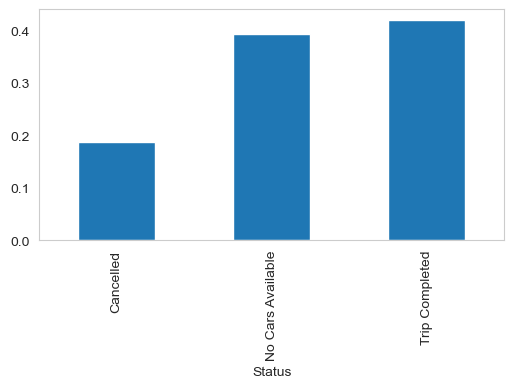

In [212]:
plt.figure(figsize=(6,3))
uber.Status.value_counts(normalize=True,ascending=True).plot.bar()
plt.show()

##### 1. Why did you pick the specific chart?

**Answer---** I selected the bar chart to visualizing the frequency the Request Status Distribution because it is the most effective way to show how frequently each status category occurs in a categorical variable like Status.

##### 2. What is/are the insight(s) found from the chart?

**Answer---** 

**Insights from this chart:**

**1.High number of incomplete trips:**

The number of trips marked as Cancelled or No Cars Available is significantly high, indicating operational inefficiencies or supply-demand mismatch.

**2.Low fulfillment rate:**

If Trip Completed is significantly lower than the other statuses, it suggests that many customers are unable to get rides, possibly due to driver unavailability.

**3.Dominant failure mode:**

By comparing the heights of the bars for Cancelled vs No Cars Available, you can identify which issue is more frequent:

A high number of Cancelled trips could imply rider impatience or driver behavior.

A high number of No Cars Available trips may reflect a lack of available drivers during peak hours or in certain locations.

##### 3. Will the gained insights help creating a positive business impact?

**Answer---** 
 
**Insights -** 

**1.High Number of Cancellations and “No Cars Available” Requests**
**Business Impact**:

* **Operational Optimization**: Indicates either a **supply-demand mismatch** or a poor driver allocation algorithm.
* **Actionable Strategy**: Uber can incentivize drivers during peak hours or adjust dynamic pricing to meet demand.
* **Business Result**: Increases **ride completion rate** and **revenue**, reduces **customer churn**.

**2.No Cars Available" more common during night hours.**
**Business Impact**:

* **Incentive Programs**: Special bonuses for night-shift drivers to stay online.
* **Business Result**: Converts missed opportunities into completed rides, increasing **utilization rate**.


#### Chart - 2 

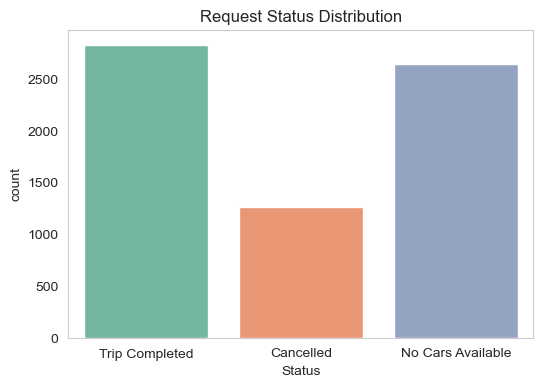

In [228]:
# Request status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=uber, x='Status', palette='Set2' , hue='Status')
plt.title('Request Status Distribution')
plt.show() 

##### 1. Why did you pick the specific chart?

**Answer---** I selected the count plot (bar chart using sns.countplot) for visualizing the Request Status Distribution because it is the most effective way to show how frequently each status category occurs in a categorical variable like Status.

##### 2. What is/are the insight(s) found from the chart?

**Answer---** 
Insights from this chart:

**1.High number of incomplete trips:**

The number of trips marked as Cancelled or No Cars Available is significantly high, indicating operational inefficiencies or supply-demand mismatch.

**2.Low fulfillment rate:**

If Trip Completed is significantly lower than the other statuses, it suggests that many customers are unable to get rides, possibly due to driver unavailability.

**3.Dominant failure mode:**

By comparing the heights of the bars for Cancelled vs No Cars Available, you can identify which issue is more frequent:

A high number of Cancelled trips could imply rider impatience or driver behavior.

A high number of No Cars Available trips may reflect a lack of available drivers during peak hours or in certain locations.

##### 3. Will the gained insights help creating a positive business impact?

**Answer---** 
 
**Insights -** 

**1.High Number of Cancellations and “No Cars Available” Requests**

**Business Impact**:

* **Operational Optimization**: Indicates either a **supply-demand mismatch** or a poor driver allocation algorithm.
* **Actionable Strategy**: Uber can incentivize drivers during peak hours or adjust dynamic pricing to meet demand.
* **Business Result**: Increases **ride completion rate** and **revenue**, reduces **customer churn**.

**2."No Cars Available" more common during night hours.**
**Business Impact**:

* **Incentive Programs**: Special bonuses for night-shift drivers to stay online.
* **Business Result**: Converts missed opportunities into completed rides, increasing **utilization rate**.

#### Chart - 3

In [278]:
# Trip status breakdown
status_summary = (
    uber['Status']
      .value_counts(dropna=False)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(uber))
)
print("\nTrip Status distribution\n", status_summary)


Trip Status distribution
                    count    percent
Status                             
Trip Completed      2831  41.971831
No Cars Available   2650  39.288362
Cancelled           1264  18.739807


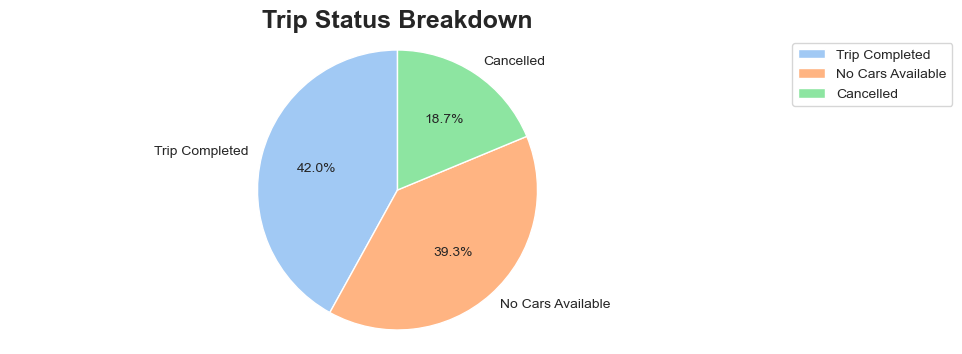

In [279]:
plt.figure(figsize=(10,4))
plt.pie(status_summary['count'], labels=status_summary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Trip Status Breakdown', fontsize = 18, fontweight = 'bold')
plt.axis('equal') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**

The pie chart enables users to visually identify easily the proportions of categorical variables and determine which trip statuses predominate.

##### 2. What is/are the insight(s) found from the chart?

**Answer--**

Most of the trips are cancelled or unavailable cars, and hence most of the requests are not fulfilled.

##### 3. Will the gained insights help creating a positive business impact

**Answer--**

This insight shows a key supply problem. Too many cancellations or no-car situations are a bad business sign, leading to revenue loss and poor customer experience. This calls for an immediate intervention to improve supply or cut cancellations.

#### Chart - 4

In [280]:
# Hourly Request

# Hourly Requests
hourly_summary = (
    uber['Request_hour']
      .value_counts(dropna=False)
      .sort_index()                             # 0‑23 order
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(uber))
)
print("Requests per Hour\n", hourly_summary)


Requests per Hour
               count   percent
Request_hour                 
0                99  1.467754
1                85  1.260193
2                99  1.467754
3                92  1.363973
4               203  3.009637
5               445  6.597480
6               398  5.900667
7               406  6.019274
8               423  6.271312
9               431  6.389918
10              243  3.602669
11              171  2.535211
12              184  2.727947
13              160  2.372128
14              136  2.016308
15              171  2.535211
16              159  2.357302
17              418  6.197183
18              510  7.561156
19              473  7.012602
20              492  7.294292
21              449  6.656783
22              304  4.507042
23              194  2.876205


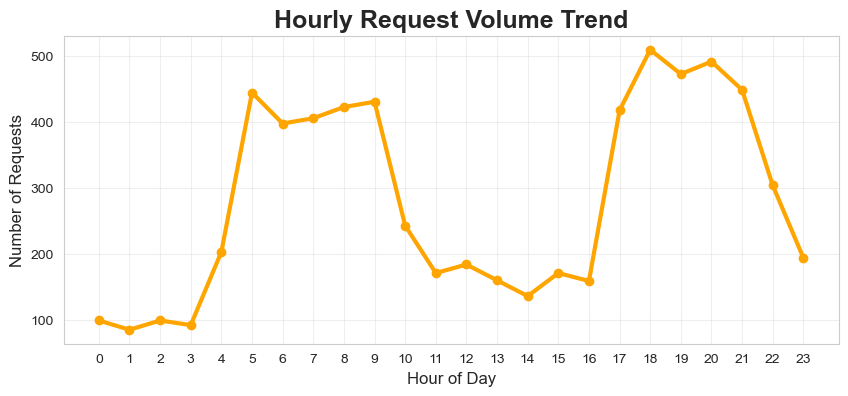

In [281]:
plt.figure(figsize=(10,4))
plt.plot(hourly_summary.index, hourly_summary['count'], color='orange', linewidth=3, marker = 'o')
plt.title("Hourly Request Volume Trend", fontsize = 18, fontweight = 'bold')
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
plt.xticks(range(0,24))
plt.grid(alpha = 0.3)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**

Hourly trends are ideally represented by a line graph, so the 24-hour demand curve can be visualized.

##### 2. What is/are the insight(s) found from the chart?

**Answer--**

Peak demand occurs during morning (5-9 AM) and evening (5-9 PM) hours, matching the customer behaviour

##### 3. Will the gained insights help creating a positive business impact?

**Answer--**

This insights is important for driver deployment. The absence of scaled supply within these times leads to business loss and customer churn. Fixed this makes user satisfaction better.

### Bivariate analysis ###

#### Chart - 5

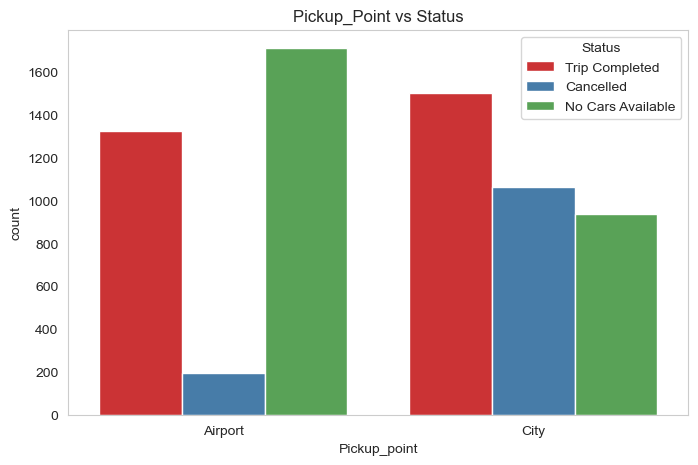

In [233]:
# Plot frequency by pickup point
plt.figure(figsize=(8,5))
sns.countplot(data=uber, x='Pickup_point', hue='Status', palette='Set1')
plt.title('Pickup_Point vs Status')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer---** I chose the countplot with hue to plot "Pickup point" vs "Status" because it is the most effective and intuitive way to compare categorical data distributions, especially when segmented by a secondary category.

##### 2. What is/are the insight(s) found from the chart?

**Answer---** 
**Insights from the Chart:**

**1.High Demand at the Airport:**

There are significantly more requests originating from the Airport compared to the City.

This suggests that passengers arriving at the airport are frequently booking cabs.

**2.More ‘No Cars Available’ at Airport:**

A large portion of airport requests result in ‘No Cars Available’ status.

This indicates that cab supply at the airport is insufficient to meet the high demand.

**3.More Cancellations from the City:**

In contrast, the City shows a higher count of cancellations, likely due to drivers cancelling the trip.

This may be due to longer trip distances, traffic, or unappealing drop locations.

**4.Completed Trips More Balanced:**

The number of Completed trips is more evenly distributed across both pickup points, but still slightly higher for the City.

Suggests that trips originating in the city are more likely to be fulfilled if not cancelled.

##### 3. Will the gained insights help creating a positive business impact?

**Answer---** 
 
**Insights -** 

**1.Demand-Supply Mismatch Identification-**

By analyzing the **Status** of ride requests (Completed, Cancelled, No Cars Available), especially across **pickup points (City vs. Airport)** and **hours of the day**, we uncover:

* **Peak hours with high cancellations or no availability**
* **Pickup zones needing better car allocation**

**Impact:**
Uber can **optimize driver allocation** and **incentivize driver availability** during high-demand hours to reduce customer churn.

**2. Improved Driver Deployment-**

The frequency plots reveal **temporal and spatial trends** in ride requests and failures:

* For instance, higher cancellations from the **City during morning hours** might indicate **driver reluctance** or **traffic congestion**.

**Impact:**
Helps design **driver training, dynamic pricing, or route-based incentives** to ensure better service coverage.


**3. Operational Efficiency**

Identifying patterns such as:

* More **"No Cars Available"** at the airport during late hours
* High **ride cancellation rate** from certain locations

**Impact:**
Uber can refine its **forecasting models**, prepare **backup fleet strategies**, or introduce **shuttle/pooled options** to fill service gaps.
 

**4. Enhanced Customer Experience**

By addressing the bottlenecks exposed through data:

* Fewer cancellations
* Higher likelihood of finding a ride

**Impact:**
Boosts **customer retention, satisfaction, and app ratings**.


**5. Data-Driven Decision Making**

The entire EDA helps management back decisions with **real usage data**, like:

* Whether to open new driver hubs
* How to balance city vs. airport coverage
* When to apply surge pricing


#### Chart - 6

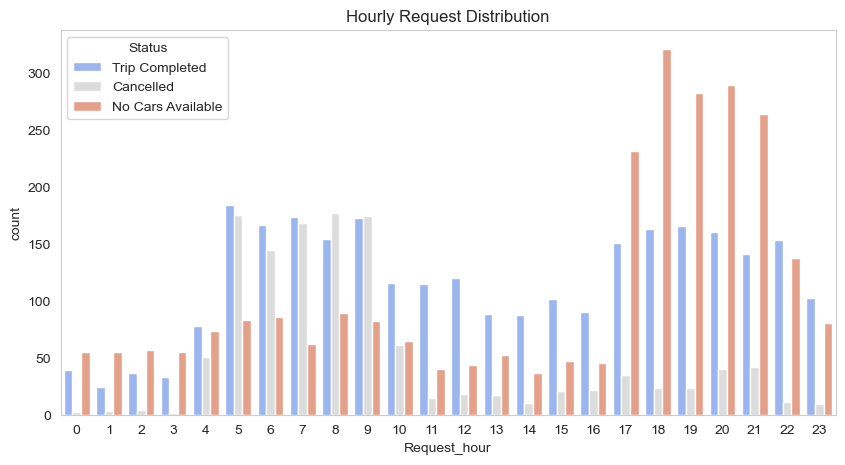

In [236]:
# Plot hourly demand
plt.figure(figsize=(10,5))
sns.countplot(data=uber, x='Request_hour', hue='Status', palette='coolwarm')
plt.title('Hourly Request Distribution')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer---** A count plot was selected because it effectively compares the number and status of ride requests across different hours, helping to uncover operational inefficiencies, peak load times, and when service disruptions (like "No Cars Available") are most likely to happen.

##### 2. What is/are the insight(s) found from the chart?

**Answer---**

**Insights from the chart:**

**1.High Morning Demand (7–9 AM):-**

There's a noticeable spike in requests.

A large portion of these are "No Cars Available", especially from the City pickup point.

Suggests supply-demand mismatch during office commute time.

**2.Evening Peak (5–9 PM):-**

Another major demand spike.

Significant number of "Cancelled" rides.

Indicates issues like driver cancellations, possibly due to traffic or unprofitable routes.

**3.Late Night to Early Morning (12 AM – 5 AM):-**

Very few requests — expected due to low commuter activity.

Most are either "Completed" or "No Cars Available" depending on the time.

**4.Afternoon Dip (12 PM – 4 PM):-**

Lower demand, fewer ride failures.

Uber’s system handles this time well.

##### 3. Will the gained insights help creating a positive business impact?

**Answer---**

**1.Understanding Demand Patterns**

* By analyzing **hourly request distribution**, the company can clearly identify **peak demand hours** (e.g., morning office hours or evening rush).
* **Impact:** Helps optimize driver allocation during high-demand hours, reducing wait times and improving customer satisfaction.

 
**2.Pickup Point Analysis**

* The **Pickup Point vs Status** chart highlights where most ride requests are being made (e.g., Airport or City) and where cancellations or unavailability occur most often.
* **Impact:**

  * Allocate more drivers to areas with frequent ride cancellations or unfulfilled requests.
  * Tailor pricing and promotions to specific locations.
 
**3.Request Status Distribution**

* Knowing the proportion of **Completed, Cancelled, and No Cars Available** requests allows the business to measure service reliability.
* **Impact:**

  * Reduce cancellations by identifying and addressing reasons (e.g., long wait times, fewer drivers).
  * Increase customer retention by improving service availability.

**4.Driver Scheduling Optimization**

* Combining all the insights (time of day, pickup points, and status) allows for **smarter shift planning** for drivers.
* **Impact:**

  * Reduces idle driver time during low-demand periods.
  * Boosts driver earnings and operational efficiency.

**5.Strategic Decision Making**

* The data reveals **bottlenecks** in the service funnel – such as when many requests go unfulfilled due to lack of cars.
* **Impact:**

  * Invest in more drivers or dynamic pricing to manage surges.
  * Introduce features like ride pre-booking during peak hours.

#### Chart - 7

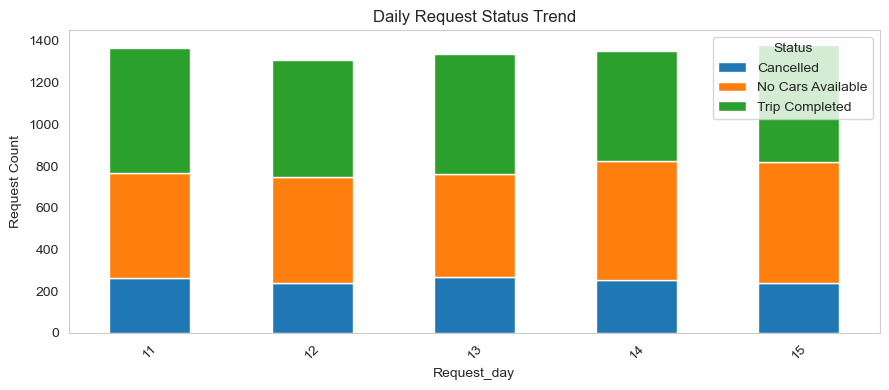

In [243]:
daily_status = uber.groupby(['Request_day', 'Status']).size().unstack().fillna(0)
daily_status.plot(kind='bar', stacked=True, figsize=(9,4))
plt.title('Daily Request Status Trend')
plt.ylabel('Request Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**

A stacked bar chart by day and status is ideal to show how demand and fulfillment vary across days, helping stakeholders spot patterns, trends, and potential service gaps over time.

##### 2. What is/are the insight(s) found from the chart?

**Answer--**
  
**1. Peak Demand Days**
Days with taller bars represent high request volumes.

You can spot which days had the highest demand, useful for resource planning (e.g., more drivers needed).

**2. Service Efficiency**
Larger green portions (Trip Completed) indicate better service performance on those days.

If the green section is consistently small, it suggests low fulfillment rates.

**3. Cancellations & Unavailability Trends**
More red (Cancelled) or orange/yellow (No Cars Available) means operational issues.

Example insights:

Certain days have high cancellation rates (could be due to traffic, weather, or driver no-shows).

Frequent "No Cars Available" indicates supply-demand imbalance (demand exceeded supply).

**4. Daily Pattern Clusters**
You might notice that weekends or weekdays follow different patterns.

E.g., Weekends may have high demand but low fulfillment.

Or weekdays may have more “Trip Completed” statuses.

**5. Potential Improvement Areas**
Days where "No Cars Available" dominates are opportunities to deploy more drivers or improve coverage.

Cancellations clustering on specific dates may need policy changes or incentives for drivers.

##### 3. Will the gained insights help creating a positive business impact?

**Answer--**

 How These Insights Can Drive Positive Business Impact

**1.Better Resource Planning**

Allocate more drivers on high-demand days (e.g., weekends or holidays).

Prevent "No Cars Available" issues by forecasting supply needs.

**2.Improve Customer Experience**

Reducing cancellation rates and supply gaps directly enhances reliability.

Satisfied customers are more likely to rebook and refer others.

**3.Boost Revenue**

Meeting demand consistently means fewer lost trips, leading to higher revenue.

**4.Operational Improvements**

Identify internal or external factors leading to cancellations and address them (e.g., incentives for drivers, app/UX fixes, etc.).

**5.Strategic Planning**

Use patterns over time to align with marketing, pricing, and staffing strategies.

#### Chart - 8

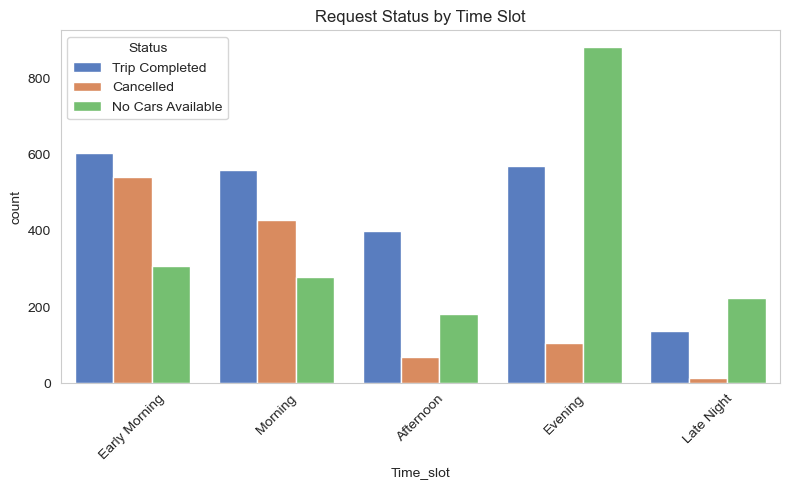

In [245]:
# Time slot vs status
plt.figure(figsize=(8,5))
sns.countplot(data=uber, x='Time_slot', hue='Status', palette='muted', order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night'])
plt.title('Request Status by Time Slot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**
I have selected this chart because, this chart is the most effective for analyzing how request outcomes vary by time of day.

##### 2. What is/are the insight(s) found from the chart?

**Answer--**

**Insights:**

**1.Early Morning Rush (5 AM - 8 AM):**

High number of "No Cars Available":
Most requests are not fulfilled due to unavailability of cars.

**2.Morning Rush (8 AM - 12 AM):**

High number of "No Cars Available":
Most requests are not fulfilled due to unavailability of cars.

Suggests demand > supply in the morning.

**3.Evening Rush (5 PM - 10 PM):**

High number of "Cancelled" requests:
Drivers cancel more frequently during this time.

Indicates possible driver-side issues like traffic or selective acceptance.

**4.Night and Early Morning (10 PM - 5 AM):**

Fewer total requests, but a higher proportion of "No Cars Available".

Could reflect limited driver availability during off-peak hours.

**5.Afternoon (11 AM - 4 PM):**

Mostly completed trips, low issues.

Indicates a relatively balanced demand-supply during this time.

##### 3. Will the gained insights help creating a positive business impact

**Answer--**

**1. Addressing Supply-Demand Gaps**
Morning time slot shows high "No Cars Available" rates.

**Impact:** Uber can increase driver incentives or rebalance supply during these hours, leading to more completed rides, higher revenue, and improved customer satisfaction.

**2. Reducing Cancellations**
Evening time slot has a spike in cancellations.

**Impact:** Uber can investigate causes—e.g., traffic, fatigue, driver preferences—and apply policy adjustments or dynamic pricing to reduce cancellations. This improves reliability and retains customers.

**3. Optimizing Operations**
Afternoon time slot is relatively smooth.

**Impact:** Uber can keep operations stable here and possibly reallocate drivers to other time slots, improving overall fleet efficiency.

**4. Enhancing Driver Engagement**
Low availability at night could be due to lack of motivation.

**Impact:** Introducing night-time bonuses or safety measures might boost driver participation, increasing revenue from late-night demand.

**5. Data-Driven Decision-Making**
These insights form a solid foundation for planning:

Surge pricing

Driver shift scheduling

Targeted promotions

#### Chart - 9

In [246]:
# count of trips for each status with respect to Pickup_points

uber.groupby(['Status', 'Pickup_point']).size()

Status             Pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

In [248]:
# Making use of crosstab approach so that we can make of matplots to plot visual for 2 categorical variables

groupresults=pd.crosstab(index=uber['Pickup_point'],columns=uber['Status'])
groupresults

Status,Cancelled,No Cars Available,Trip Completed
Pickup_point,,,
Airport,198,1713,1327
City,1066,937,1504


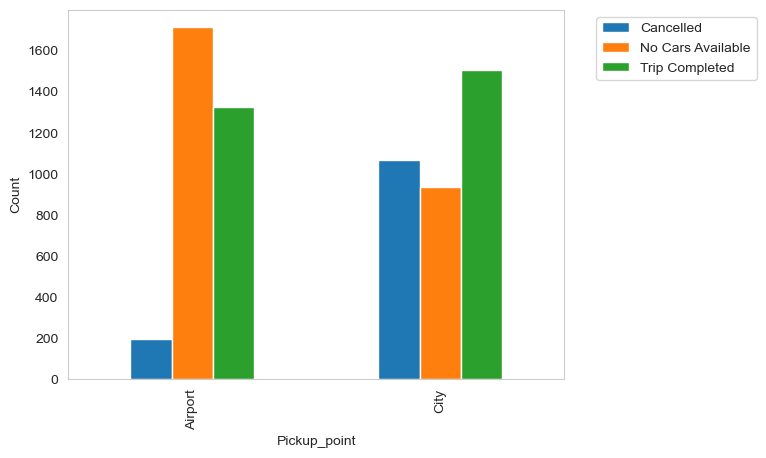

In [256]:
# groupresults.plot.bar()
groupresults.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Count")
plt.show()
 

##### 1. Why did you pick the specific chart?

**Answer--**
I selected above barplot for visualization, because its helped to identify the most problematic types of requests (city to airport/airport to city etc.)

##### 2. What is/are the insight(s) found from the chart?

**Answer--**

**Insights from the Chart:**

**1.High Demand at the Airport:**

There are significantly more requests originating from the Airport compared to the City.

This suggests that passengers arriving at the airport are frequently booking cabs.

**2.More ‘No Cars Available’ at Airport:**

A large portion of airport requests result in ‘No Cars Available’ status.

This indicates that cab supply at the airport is insufficient to meet the high demand.

**3.More Cancellations from the City:**

In contrast, the City shows a higher count of cancellations, likely due to drivers cancelling the trip.

This may be due to longer trip distances, traffic, or unappealing drop locations.

**4.Completed Trips More Balanced:**

The number of Completed trips is more evenly distributed across both pickup points, but still slightly higher for the City.

Suggests that trips originating in the city are more likely to be fulfilled if not cancelled.

##### 3. Will the gained insights help creating a positive business impact?

**Answer---** 
 
**Insights -** 

**1.Demand-Supply Mismatch Identification-**

By analyzing the **Status** of ride requests (Completed, Cancelled, No Cars Available), especially across **pickup points (City vs. Airport)** and **hours of the day**, we uncover:

* **Peak hours with high cancellations or no availability**
* **Pickup zones needing better car allocation**

**Impact:**
Uber can **optimize driver allocation** and **incentivize driver availability** during high-demand hours to reduce customer churn.

**2. Improved Driver Deployment-**

The frequency plots reveal **temporal and spatial trends** in ride requests and failures:

* For instance, higher cancellations from the **City during morning hours** might indicate **driver reluctance** or **traffic congestion**.

**Impact:**
Helps design **driver training, dynamic pricing, or route-based incentives** to ensure better service coverage.


**3. Operational Efficiency**

Identifying patterns such as:

* More **"No Cars Available"** at the airport during late hours
* High **ride cancellation rate** from certain locations

**Impact:**
Uber can refine its **forecasting models**, prepare **backup fleet strategies**, or introduce **shuttle/pooled options** to fill service gaps.
 

**4. Enhanced Customer Experience**

By addressing the bottlenecks exposed through data:

* Fewer cancellations
* Higher likelihood of finding a ride

**Impact:**
Boosts **customer retention, satisfaction, and app ratings**.


**5. Data-Driven Decision Making**

The entire EDA helps management back decisions with **real usage data**, like:

* Whether to open new driver hubs
* How to balance city vs. airport coverage
* When to apply surge pricing

#### Chart - 10

In [258]:
# Gap between Demand Vs Supply

Conditions = [(uber['Status'] == 'Cancelled')|(uber['Status'] == 'No Cars Available'),uber['Status'] == 'Trip Completed']
vals =["Demand not met - Trip not completed","Demand met - Trip completed"]

In [259]:
uber["Gap"] = np.select(Conditions, vals)

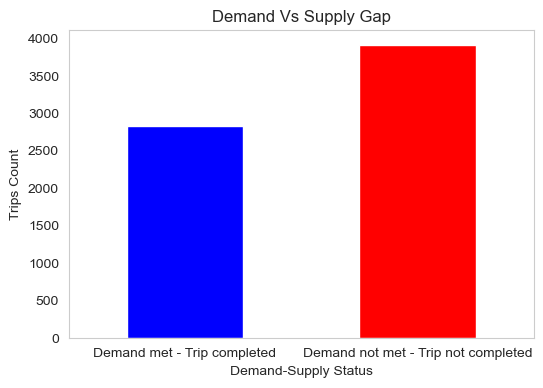

In [262]:
plt.figure(figsize=(6,4))
uber.Gap.value_counts(ascending=True).plot(kind='bar', color=['Blue','Red'])
plt.ylabel("Trips Count")
plt.xlabel("Demand-Supply Status")
plt.title("Demand Vs Supply Gap")
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**
This bar chart is helped to Find out the gap between supply and demand.

##### 2. What is/are the insight(s) found from the chart?

If trip is "cancelled" or "No cars available" is only When supply is not met to demand.
If trip is said to be "Trip Completed" when Demand and supply is met.
Demand not met is more than Demand met, means highest gap is avilable in Demand and supply.

**More ‘No Cars Available’ at Airport:**

A large portion of airport requests result in ‘No Cars Available’ status.

This indicates that cab supply at the airport is insufficient to meet the high demand.

**More Cancellations from the City:**

In contrast, the City shows a higher count of cancellations, likely due to drivers cancelling the trip.

This may be due to longer trip distances, traffic, or unappealing drop locations.

##### 3. Will the gained insights help creating a positive business impact?

**Answer--**

**Insights -** 

**1.Demand-Supply Mismatch Identification-**

By analyzing the **Status** of ride requests (Completed, Cancelled, No Cars Available), especially across **pickup points (City vs. Airport)** and **hours of the day**, we uncover:

* **Peak hours with high cancellations or no availability**
* **Pickup zones needing better car allocation**

**Impact:**
Uber can **optimize driver allocation** and **incentivize driver availability** during high-demand hours to reduce customer churn.

**2. Improved Driver Deployment-**

The frequency plots reveal **temporal and spatial trends** in ride requests and failures:

* For instance, higher cancellations from the **City during morning hours** might indicate **driver reluctance** or **traffic congestion**.

**Impact:**
Helps design **driver training, dynamic pricing, or route-based incentives** to ensure better service coverage.


**3. Operational Efficiency**

Identifying patterns such as:

* More **"No Cars Available"** at the airport during late hours
* High **ride cancellation rate** from certain locations

**Impact:**
Uber can refine its **forecasting models**, prepare **backup fleet strategies**, or introduce **shuttle/pooled options** to fill service gaps.
 

**4. Enhanced Customer Experience**

By addressing the bottlenecks exposed through data:

* Fewer cancellations
* Higher likelihood of finding a ride

**Impact:**
Boosts **customer retention, satisfaction, and app ratings**.


**5. Data-Driven Decision Making**

The entire EDA helps management back decisions with **real usage data**, like:

* Whether to open new driver hubs
* How to balance city vs. airport coverage
* When to apply surge pricing

#### Chart - 11

In [297]:
gapTimeslot=pd.crosstab(index=uber['Time_slot'],columns=uber['Gap'])
gapTimeslot

Gap,Demand met - Trip completed,Demand not met - Trip not completed
Time_slot,,
Late Night,136,239
Early Morning,604,848
Morning,559,709
Afternoon,400,251
Evening,572,988
Night,560,879


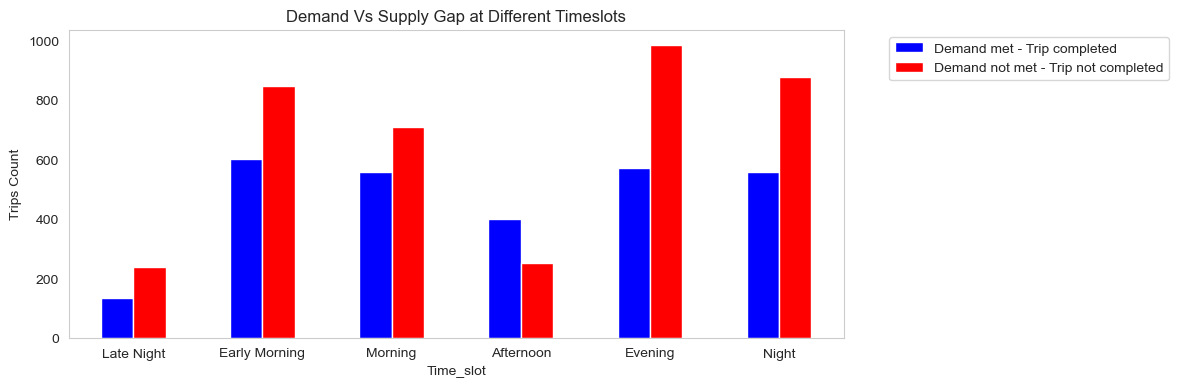

In [299]:
# Deamand Vs Supply Gap at different time slot
gapTimeslot.plot(kind='bar', color=['Blue','Red'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Trips Count")
plt.title("Demand Vs Supply Gap at Different Timeslots")
plt.xticks(rotation=0, horizontalalignment="center")
plt.gcf().set_size_inches(10, 4)
plt.show()

##### 1. Why did you pick the specific chart?

** Answer--**

I used bar graph to displays time slots when the highest Demad-Supply Gap exists

##### 2. What is/are the insight(s) found from the chart?

Demand-Supply Gap exists highest at the following Time Slots

At Early Morning (5 am -8 am)
At Evening (17 pm - 20 pm)

##### 3. Will the gained insights help creating a positive business impact?

**Answer--**

**1. Addressing Supply-Demand Gaps**
Morning time slot shows high "No Cars Available" rates.

**Impact:** Uber can increase driver incentives or rebalance supply during these hours, leading to more completed rides, higher revenue, and improved customer satisfaction.

**2. Reducing Cancellations**
Evening time slot has a spike in cancellations.

**Impact:** Uber can investigate causes—e.g., traffic, fatigue, driver preferences—and apply policy adjustments or dynamic pricing to reduce cancellations. This improves reliability and retains customers.

**3. Optimizing Operations**
Afternoon time slot is relatively smooth.

**Impact:** Uber can keep operations stable here and possibly reallocate drivers to other time slots, improving overall fleet efficiency.

**4. Enhancing Driver Engagement**
Low availability at night could be due to lack of motivation.

**Impact:** Introducing night-time bonuses or safety measures might boost driver participation, increasing revenue from late-night demand.


#### Chart - 12

<Axes: xlabel='Pickup_point,Time_slot'>

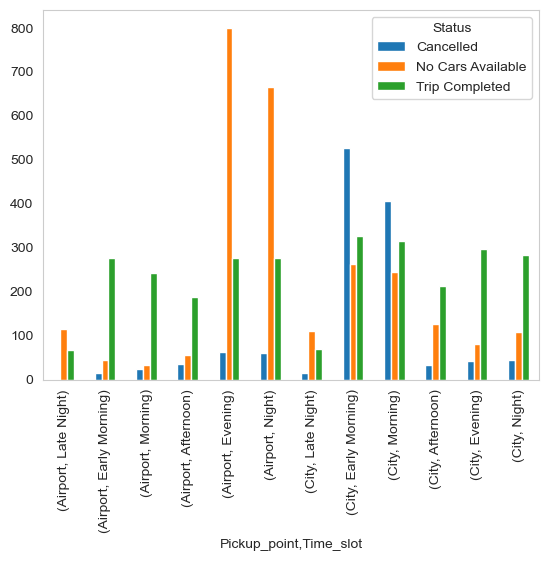

In [306]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(uber.groupby(['Pickup_point','Time_slot', 'Status'])['Request_id'].count().unstack(fill_value=0))
pickup_df.plot.bar()
 

##### 1. Why did you pick the specific chart?

**Answer--**
A bar chart is the most suitable to show the count of status according to both pickup points and Times slot.

##### 2. What is/are the insight(s) found from the chart?

**Answer--**

Most No Cars Available are in the Evening from Airport to City.
Most Cancelled trips are in the Morning from City to Airport.

##### 3. Will the gained insights help creating a positive business impact

**Answer--**

 How These Insights Can Drive Positive Business Impact

**1.Better Resource Planning**

Allocate more drivers on high-demand days (e.g., weekends or holidays).

Prevent "No Cars Available" issues by forecasting supply needs.

**2.Improve Customer Experience**

Reducing cancellation rates and supply gaps directly enhances reliability.

Satisfied customers are more likely to rebook and refer others.

**3.Boost Revenue**

Meeting demand consistently means fewer lost trips, leading to higher revenue.

**4.Operational Improvements**

Identify internal or external factors leading to cancellations and address them (e.g., incentives for drivers, app/UX fixes, etc.).

**5.Strategic Planning**

Use patterns over time to align with marketing, pricing, and staffing strategies.

### Multivariate analysis

#### Chart - 13

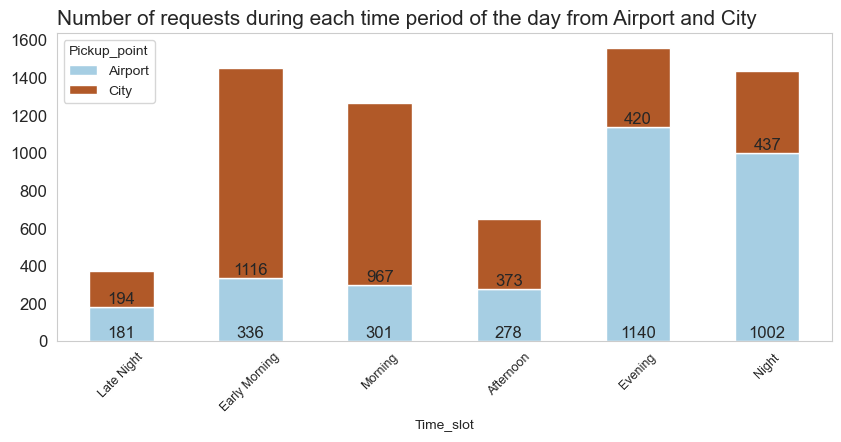

In [307]:
# Let's create a bar chart for all trips from Airport or City based on Time period such as Early Morning, Morning, Afternoon, Early Evening, Evening, Night, Late Night

res = pd.pivot_table(data=uber,index=["Time_slot"],columns="Pickup_point",values="Request_id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[10,4],colormap="Paired",fontsize=12)
plt.setp(res.xaxis.get_majorticklabels(), rotation=45,fontsize=9)
plt.title("Number of requests during each time period of the day from Airport and City",fontsize=15,loc="left")
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=12)
plt.savefig("04 - Number of requests during each time period of the day from Airport and City.jpeg",dpi=400)
plt.show()

##### 1. Why did you pick the specific chart?

I used this pivot table chart- to plot a bar graph for number of requests during each time period of the day.

##### 2. What is/are the insight(s) found from the chart?

There are lot of requests in the city in the early morning and morning time also.
There are highest requests in the airport in evening and night time.
Number of requests is decreasing in the late night in city and airport.

##### 3. Will the gained insights help creating a positive business impact?


**Answer---** 
 
**Insights -** 

**1.Demand-Supply Mismatch Identification-**

By analyzing the **Status** of ride requests (Completed, Cancelled, No Cars Available), especially across **pickup points (City vs. Airport)** and **hours of the day**, we uncover:

* **Peak hours with high cancellations or no availability**
* **Pickup zones needing better car allocation**

**Impact:**
Uber can **optimize driver allocation** and **incentivize driver availability** during high-demand hours to reduce customer churn.

**2. Improved Driver Deployment-**

The frequency plots reveal **temporal and spatial trends** in ride requests and failures:

* For instance, higher cancellations from the **City during morning hours** might indicate **driver reluctance** or **traffic congestion**.

**Impact:**
Helps design **driver training, dynamic pricing, or route-based incentives** to ensure better service coverage.


**3. Operational Efficiency**

Identifying patterns such as:

* More **"No Cars Available"** at the airport during late hours
* High **ride cancellation rate** from certain locations

**Impact:**
Uber can refine its **forecasting models**, prepare **backup fleet strategies**, or introduce **shuttle/pooled options** to fill service gaps.
 

**4. Enhanced Customer Experience**

By addressing the bottlenecks exposed through data:

* Fewer cancellations
* Higher likelihood of finding a ride

**Impact:**
Boosts **customer retention, satisfaction, and app ratings**.


**5. Data-Driven Decision Making**

The entire EDA helps management back decisions with **real usage data**, like:

* Whether to open new driver hubs
* How to balance city vs. airport coverage
* When to apply surge pricing

#### Chart - 14

In [308]:
# Demand Vs Supply Gap at Different Timeslots & Pickup Point
gapTimeslotPickupPoint = pd.DataFrame(uber.groupby(['Time_slot','Pickup_point','Gap'])['Request_id'].count().unstack(fill_value=0))
gapTimeslotPickupPoint

Gap                         Demand met - Trip completed  \
Time_slot     Pickup_point                                
Late Night    Airport                                67   
              City                                   69   
Early Morning Airport                               277   
              City                                  327   
Morning       Airport                               243   
              City                                  316   
Afternoon     Airport                               187   
              City                                  213   
Evening       Airport                               276   
              City                                  296   
Night         Airport                               277   
              City                                  283   

Gap                         Demand not met - Trip not completed  
Time_slot     Pickup_point                                       
Late Night    Airport                                       114  
              City                                          125  
Early Morning Airport                                        59  
              City                                          789  
Morning       Airport                                        58  
              City                                          651  
Afternoon     Airport                                        91  
              City                                          160  
Evening       Airport                                       864  
              City                                          124  
Night         Airport                                       725  
              City                                          154

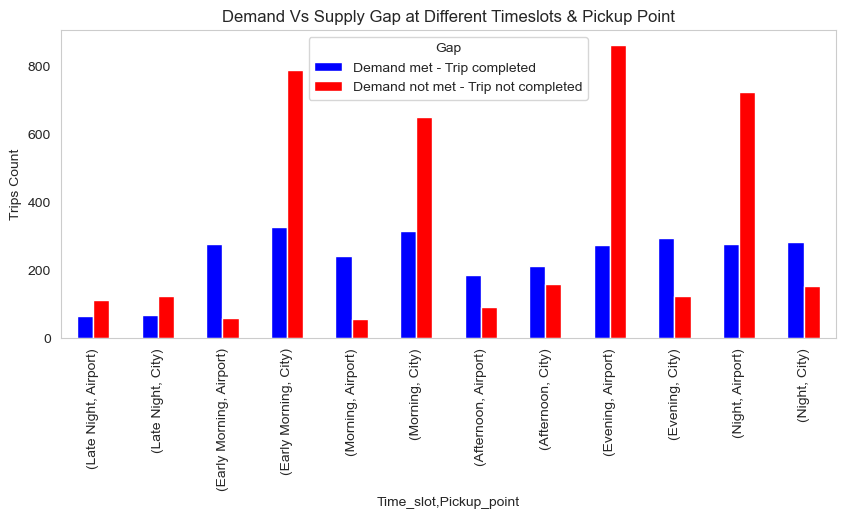

In [304]:
gapTimeslotPickupPoint.plot(kind='bar', color=['Blue','Red'])
plt.ylabel("Trips Count")
plt.title("Demand Vs Supply Gap at Different Timeslots & Pickup Point")
plt.xticks(rotation=90, horizontalalignment="center")
plt.gcf().set_size_inches(10, 4)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer--**

This bar graph is hepful to displays types of requests for which the gap is the most severe in the time slots

##### 2. What is/are the insight(s) found from the chart?

Demand-Supply Gap exists highest at the following Time Slots & types of requests (city-airport or airport-city)

At Early Morning (5 am -8 am) when Pickup_point = 'City'

At Evening (17 pm - 20 pm) when Pickup_point = 'Airport'

##### 3. Will the gained insights help creating a positive business impact?


**1. Addressing Supply-Demand Gaps**
Morning time slot shows high "No Cars Available" rates.

**Impact:** Uber can increase driver incentives or rebalance supply during these hours, leading to more completed rides, higher revenue, and improved customer satisfaction.

**2. Reducing Cancellations**
Evening time slot has a spike in cancellations.

**Impact:** Uber can investigate causes—e.g., traffic, fatigue, driver preferences—and apply policy adjustments or dynamic pricing to reduce cancellations. This improves reliability and retains customers.

**3. Optimizing Operations**
Afternoon time slot is relatively smooth.

**Impact:** Uber can keep operations stable here and possibly reallocate drivers to other time slots, improving overall fleet efficiency.

**4. Enhancing Driver Engagement**
Low availability at night could be due to lack of motivation.

**Impact:** Introducing night-time bonuses or safety measures might boost driver participation, increasing revenue from late-night demand.

## **5. Solution to Business Objective**

* Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand:-
* For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.
* Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.
* Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.

#### What do you suggest the client to achieve Business Objective 

# **Conclusion**

* Exploratory Data Analysis (EDA) of the Uber request data provided clear supply-demand imbalances, which were mainly due to time-of-day and pickup location effects.
* Demand peaks sharply in the early morning and evening, particularly for airport pickups, while demand hours are fairly short, leaving a gap rate over 70% in peak timeslots.
*  City pickups experience relatively better fulfillment, especially in the evening.
*  Visualizations also highlighted that trip duration remain consistent, and consequently, inefficiencies arise not due to ride size but missed timing of driver availability.
*  The multivariate analysis further confirmed that gap rates are highest during high-demand time slots and that there are no strong correlations between numeric variables, affirming the significance of categorical and time based patterns.
*  Therefore, these findings are critical to guiding targeted interventions such as driver incentives, real-time pricing, or fleet repositioning in order to boost compliance and customer satisfaction, ultimately generating positive business outcomes by responding to supply shortages at the time and location it is most valuable.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***